# Выбор локации для скважины

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats as st

In [2]:
# количество исследуемых скважин
RESEARCH_BOREHOLE = 500 

# количество лучших скважин 
BEST_BOREHOLE = 200

# бюджет на разработку скважин в регионе
BUDGET = 10_000_000_000 

# доход с тысячи баррелей нефти
PRICE_PER_1000_BARREL = 450_000 

In [3]:
try:
    data_0 = pd.read_csv('geo_data_0.csv')
    data_1 = pd.read_csv('geo_data_1.csv')
    data_2 = pd.read_csv('geo_data_2.csv')
    
except:
    print('Ошибка загрузки данных')

display(data_0.head())
display(data_1.head())
display(data_2.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


**Вывод информации о данных, проверка данных на пропуски и дубликаты**

Информация по региону 0
***********************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Количество пропусков:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Количество полных дубликатов: 0
Количество дубликатов в столбце "id": 10

Распределение целевой переменной в регионе


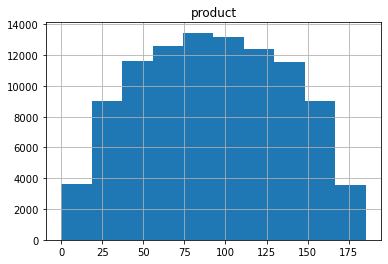


Тепловая карта корреляции


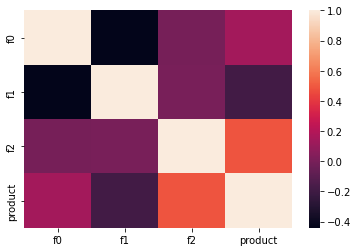

Информация по региону 1
***********************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Количество пропусков:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Количество полных дубликатов: 0
Количество дубликатов в столбце "id": 4

Распределение целевой переменной в регионе


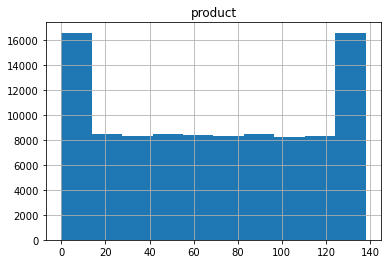


Тепловая карта корреляции


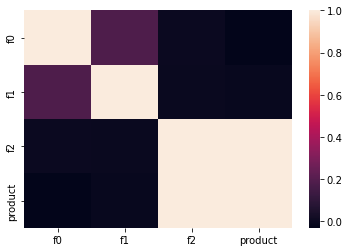

Информация по региону 2
***********************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Количество пропусков:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Количество полных дубликатов: 0
Количество дубликатов в столбце "id": 4

Распределение целевой переменной в регионе


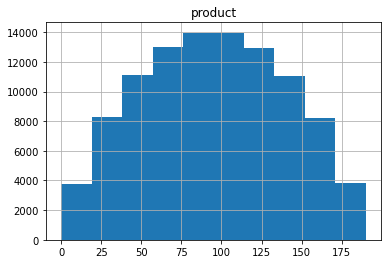


Тепловая карта корреляции


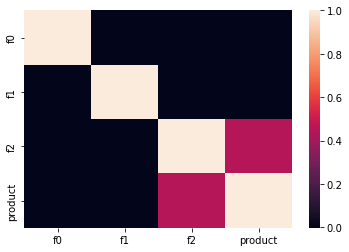

In [4]:
for d, i in [(data_0, 0), (data_1, 1), (data_2, 2)]:
    print(f'Информация по региону {i}')
    print('*' * 23, end='\n\n')
    print(d.info(), end='\n\n')
    print('Количество пропусков:')
    print(d.isna().sum(), end='\n\n')
    print(f'Количество полных дубликатов: {d.duplicated().sum()}')
    print('Количество дубликатов в столбце "id":', d['id'].duplicated().sum(), end='\n\n')
    print('Распределение целевой переменной в регионе')
    d.hist(column='product')
    plt.show()
    print()
    print('Тепловая карта корреляции')
    sns.heatmap(d.corr())
    plt.show()

In [5]:
# удаление дубликатов по столбцу "id"

data_0 = data_0.drop_duplicates(subset=['id']).reset_index(drop=True)
data_1 = data_1.drop_duplicates(subset=['id']).reset_index(drop=True)
data_2 = data_2.drop_duplicates(subset=['id']).reset_index(drop=True)

**Вывод**

Для региона "1" присутствует сильная корреляция между целевым признаком и признаком "f2". Если это не утечка данных, то можно считать, что признак "f2" очень хорошо предсказывает целевой признак.

## Обучение и проверка модели

In [6]:
# функция для получения предсказаний и правильных ответов на валидационной выборке, 
# а также среднего объёма нефти на скважину по региону и RMSE модели

def results(data):
    
    features = data[['f0', 'f1', 'f2']]
    target = data['product']
    
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)
    
    model = LinearRegression()
    model.fit(features_train, target_train) 
    predicted_valid = model.predict(features_valid) 

    rmse = mean_squared_error(target_valid, predicted_valid) ** 0.5
    
    average = predicted_valid.mean()
    
    print(f'Средний запас предсказанного объёма нефти на скважину: {average:.1f} тыс. баррелей, RMSE модели: {rmse:.1f} тыс. баррелей', end='\n\n')
    
    return predicted_valid, target_valid, average, rmse

In [7]:
# расчёты и сохранение данных для региона "0"

print('Данные по региону "0":')
predicted_valid_0, target_valid_0, average_0, rmse_0 = results(data_0)

# расчёты и сохранение данных для региона "1"

print('Данные по региону "1":')
predicted_valid_1, target_valid_1, average_1, rmse_1 = results(data_1)

# расчёты и сохранение данных для региону "2"

print('Данные по региону "2":')
predicted_valid_2, target_valid_2, average_2, rmse_2 = results(data_2)    

Данные по региону "0":
Средний запас предсказанного объёма нефти на скважину: 92.8 тыс. баррелей, RMSE модели: 37.9 тыс. баррелей

Данные по региону "1":
Средний запас предсказанного объёма нефти на скважину: 69.2 тыс. баррелей, RMSE модели: 0.9 тыс. баррелей

Данные по региону "2":
Средний запас предсказанного объёма нефти на скважину: 94.9 тыс. баррелей, RMSE модели: 40.1 тыс. баррелей



**Вывод**

Наиболее точные предсказания получены для региона "1": данные предсказаны с точностью до 0.9 тыс. баррелей.

## Подготовка к расчёту прибыли

In [8]:
# минимальный средний объём баррелей нефти для каждого месторождения для безубыточной добычи

min_barrel = BUDGET / (PRICE_PER_1000_BARREL * BEST_BOREHOLE)
print(f'Минимальное среднее количество продукта в скважине, достаточное для разработки: {min_barrel:.1f} тыс. баррелей')

Минимальное среднее количество продукта в скважине, достаточное для разработки: 111.1 тыс. баррелей


In [9]:
# расчёт среднего реального запаса для каждого региона

for d, i in [(data_0, 0), (data_1, 1), (data_2, 2)]:
    mean_product = d['product'].mean()
    print(f'Средний запас для региона "{i}": {mean_product:.1f} тыс. баррелей')

Средний запас для региона "0": 92.5 тыс. баррелей
Средний запас для региона "1": 68.8 тыс. баррелей
Средний запас для региона "2": 95.0 тыс. баррелей


Таким образом, средний запас предсказанного объёма нефти на скважину в каждом из трёх регионов меньше объёма, достаточного для разработки.

In [10]:
# функция расчёта прибыли по выбранным скважинам

def profit(target, predictions):    
     
    predictions_sorted = predictions.sort_values(ascending=False)
    selected_targets = target[predictions_sorted.index][:BEST_BOREHOLE]   
    
    return PRICE_PER_1000_BARREL * selected_targets.sum() - BUDGET

## Расчёт прибыли и рисков 

In [11]:
# функция расчёта рисков и прибыли по регионам

def profit_and_risk(target, predictions):
    
    target = target.reset_index(drop=True)
    predictions = pd.Series(predictions)
    
    
    state = np.random.RandomState(12345)
    profits = []
    
    for _ in range(1000):
            
            target_subsample = target.sample(n=RESEARCH_BOREHOLE, replace=True, random_state=state)
            predictions_subsample = predictions[target_subsample.index]
            
            profits.append(profit(target_subsample, predictions_subsample))
    
    profits = pd.Series(profits)
    
    lower = profits.quantile(0.025)
    upper = profits.quantile(0.975)
    
    risk_count = 0
    
    for c in profits:
        if c < 0:
            risk_count += 1
    
    risk = risk_count / len(profits)
        
    print(f'Средняя прибыль по региону: {profits.mean():.0f} рублей')
    print(f'95%-ый доверительный интервал: от {lower:.0f} до {upper:.0f} рублей')
    print(f'Риск: {risk:.1%}')

**Регион "0"**

In [12]:
profit_and_risk(target_valid_0, predicted_valid_0)

Средняя прибыль по региону: 409428039 рублей
95%-ый доверительный интервал: от -131536029 до 944395583 рублей
Риск: 7.1%


**Регион "1"**

In [13]:
profit_and_risk(target_valid_1, predicted_valid_1)

Средняя прибыль по региону: 536902587 рублей
95%-ый доверительный интервал: от 114527903 до 970787911 рублей
Риск: 0.9%


**Регион "2"**

In [14]:
profit_and_risk(target_valid_2, predicted_valid_2)

Средняя прибыль по региону: 353790363 рублей
95%-ый доверительный интервал: от -159194031 до 875652503 рублей
Риск: 10.2%


## Вывод

Наиболее выгодным регионом для разработки является регион "1", он имеет максимальную среднюю прибыль в 536902587 рублей (95%-ый доверительный интервал: от 114527903 до 970787911 рублей) и минимальные риски в 1%.